In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

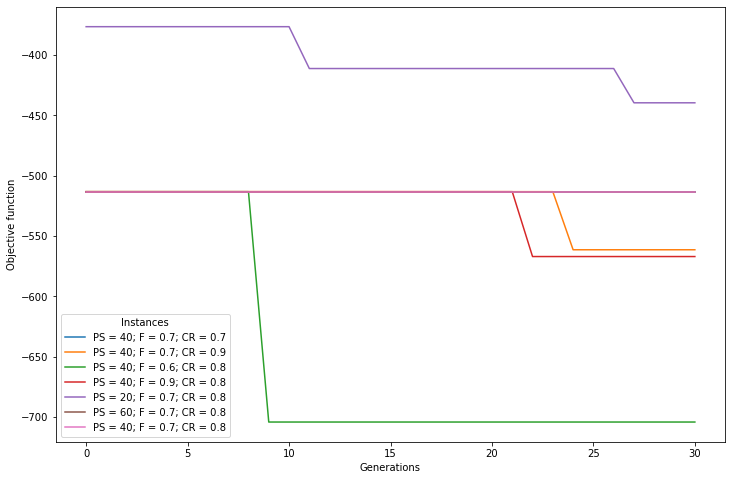

In [25]:
# Small experiments
plt.figure(figsize=(12, 8))
for cr in [0.7, 0.9]:
    df = pd.read_excel(f'objective_cr{cr}.xlsx')
    plt.plot(df.index.values, df['z'], label=f'PS = 40; F = 0.7; CR = {cr}')

for f in [0.6, 0.9]:
    df = pd.read_excel(f'objective_f{f}.xlsx')
    plt.plot(df.index.values, df['z'], label=f'PS = 40; F = {f}; CR = 0.8')
    
for ps in [20, 60]:
    df = pd.read_excel(f'objective_popsize{ps}.xlsx')
    plt.plot(df.index.values, df['z'], label=f'PS = {ps}; F = 0.7; CR = 0.8')
    
# Base instace
df = pd.read_excel(f'objective_popsize40.xlsx')
plt.plot(df.index.values, df['z'], label=f'PS = 40; F = 0.7; CR = 0.8')

plt.xlabel('Generations')
plt.ylabel('Objective function')
plt.legend(loc=3, title='Instances')
plt.savefig(f'small_experiments.pdf');

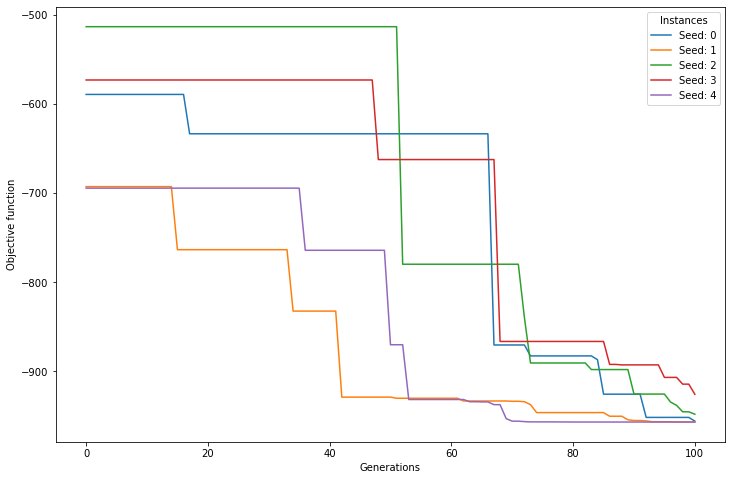

In [28]:
# DE rand experiments
plt.figure(figsize=(12, 8))
for seed in [0, 1, 2, 3, 4]:
    df = pd.read_excel(f'de_rand_objective_seed{seed}.xlsx')
    plt.plot(df.index.values, df['z'], label=f'Seed: {seed}')

plt.xlabel('Generations')
plt.ylabel('Objective function')
plt.legend(loc=1, title='Instances')
plt.savefig(f'de_rand_experiments.pdf');

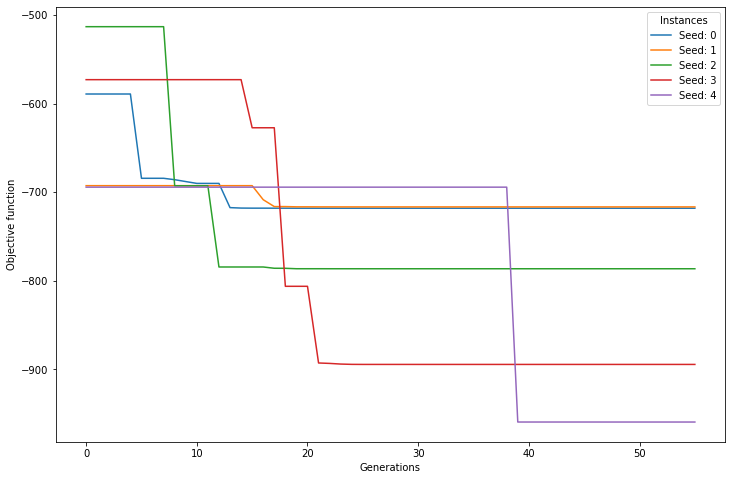

In [31]:
# DE best experiments
plt.figure(figsize=(12, 8))
for seed in [0, 1, 2, 3, 4]:
    df = pd.read_excel(f'de_best_objective_seed{seed}.xlsx')
    plt.plot(df.index.values, df['z'], label=f'Seed: {seed}')

plt.xlabel('Generations')
plt.ylabel('Objective function')
plt.legend(loc=1, title='Instances')
plt.savefig(f'de_best_experiments.pdf');

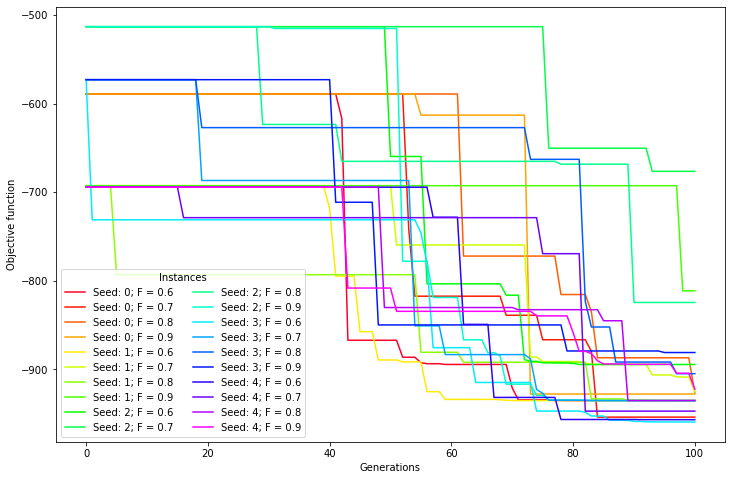

In [22]:
import matplotlib.cm as mplcm
import matplotlib.colors as colors
# DE rand experiments changing f

NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
NUM_STYLES = 1
i = 0
for seed in [0, 1, 2, 3, 4]:
    for f_it in [0.6, 0.7, 0.8, 0.9]: 
        df = pd.read_excel(f'de_rand_objective_seed{seed}_f{f_it}.xlsx')
        lines = ax.plot(df.index.values, df['z'], label=f'Seed: {seed}; F = {f_it}')
        lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
        i += 1

plt.xlabel('Generations')
plt.ylabel('Objective function')
plt.legend(loc=3, title='Instances', ncol=2)
plt.savefig(f'de_rand_experiments_changing_f.pdf');

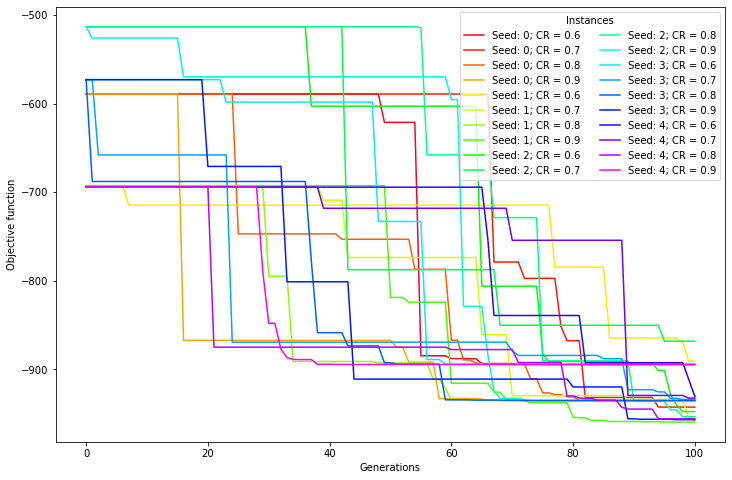

In [6]:
## import matplotlib.cm as mplcm
import matplotlib.colors as colors
# DE rand experiments changing cr
# 
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
NUM_STYLES = 1
i = 0
for seed in [0, 1, 2, 3, 4]:
    for cr_it in [0.6, 0.7, 0.8, 0.9]: 
        df = pd.read_excel(f'de_rand_objective_seed{seed}_cr{cr_it}.xlsx')
        lines = ax.plot(df.index.values, df['z'], label=f'Seed: {seed}; CR = {cr_it}')
        lines[0].set_color(cm(i//NUM_STYLES*float(NUM_STYLES)/NUM_COLORS))
        i += 1

plt.xlabel('Generations')
plt.ylabel('Objective function')
plt.legend(loc=1, title='Instances', ncol=2)
plt.savefig(f'de_rand_experiments_changing_cr.pdf');

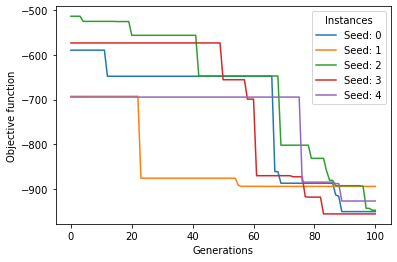

In [10]:
# DE best experiments
plt.figure(figsize=(6, 4))
for seed in [0, 1, 2, 3, 4]:
    df = pd.read_excel(f'de_rand_objective_seed{seed}_fdynamic.xlsx')
    plt.plot(df.index.values, df['z'], label=f'Seed: {seed}')

plt.xlabel('Generations')
plt.ylabel('Objective function')
plt.legend(loc=1, title='Instances')
plt.savefig(f'de_best_fdynamic.pdf');

In [103]:
def f(x, y):
    return -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))

x = np.linspace(-512, 512, 500)
y = np.linspace(-512, 512, 500)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

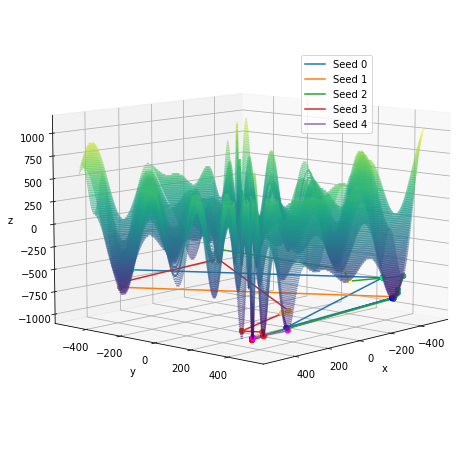

In [125]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, alpha = 0.6)

cmap_list = ['winter', 'Wistia', 'summer', 'autumn', 'spring']
color_list = ['g', 'r', 'b', 'p', 'y']
for seed in [0, 1, 2, 3, 4]:
    df = pd.read_excel(f'de_rand_objective_seed{seed}_fdynamic.xlsx')
    ax.scatter(df['x'],  df['y'],  df['z'], c=zdata, cmap=cmap_list[seed]);
    ax.plot(df['x'],  df['y'],  df['z'], zorder=1, label=f'Seed {seed}')

#ax.set_zlim(-1000, 0)
ax.legend(bbox_to_anchor=(0.8, 0.9), ncol=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(9, 42)
plt.savefig('fdynamic_function.pdf', bbox_inches='tight',pad_inches = 0)

In [39]:
zdata

0     -572.979871
1     -572.979871
2     -572.979871
3     -572.979871
4     -572.979871
          ...    
96    -956.305778
97    -956.305778
98    -956.305778
99    -956.305778
100   -956.305778
Name: z, Length: 101, dtype: float64

Text(0.5, 0, 'z')

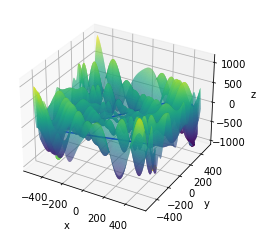

In [33]:
ax = plt.axes(projection='3d')
ax.scatter(xdata, ydata, zdata, c=zdata);
ax.plot(xdata, ydata, color = 'b')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')